In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_reduced= pd.read_csv('/home/youmna/Heart-Disease-Prediction/data/reduced_heart_disease.csv')
x= df_reduced.drop('target', axis=1)
y=df_reduced['target']

In [20]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train ,  y_test = train_test_split (x,y ,test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}


for name, model in models.items():
    model.fit(x_train, y_train)


/home/youmna/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


with open('/home/youmna/Heart-Disease-Prediction/results/evaluation_metrics.txt', 'w') as f:
    for name, model in models.items():
        y_predict = model.predict(x_test)  
        y_predict = y_predict.astype(int)
        y_true = y_test.astype(int)

        acc = accuracy_score(y_true, y_predict)
        prec = precision_score(y_true, y_predict, average='micro')
        rec = recall_score(y_true, y_predict, average='micro')
        f1 = f1_score(y_true, y_predict, average='micro')

        f.write(f"{name}\n")
        f.write(f"Accuracy : {acc:.4f}\n")
        f.write(f"Precision: {prec:.4f}\n")
        f.write(f"Recall   : {rec:.4f}\n")
        f.write(f"F1 Score : {f1:.4f}\n\n")



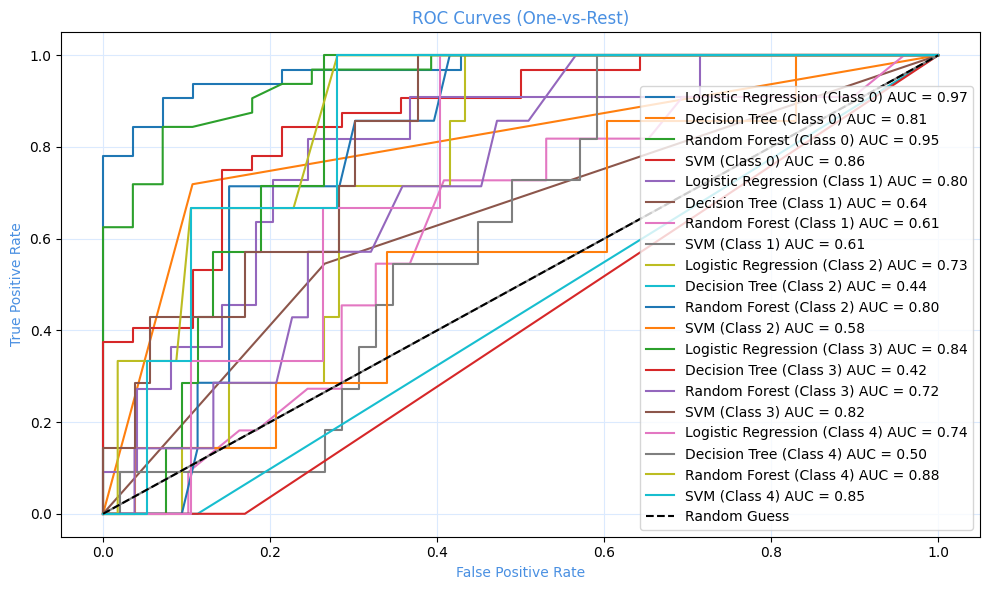

In [23]:
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10,6))

for i, class_label in enumerate(classes):
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(x_test)[:, i]
        else:
            y_score = model.decision_function(x_test)
            if len(y_score.shape) > 1:
                y_score = y_score[:, i]

        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score)
        auc_score = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{name} (Class {class_label}) AUC = {auc_score:.2f}")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate', color='#4a90e2')
plt.ylabel('True Positive Rate', color='#4a90e2')
plt.title('ROC Curves (One-vs-Rest)', color='#4a90e2')
plt.legend(loc='lower right')
plt.grid(True, color='#dbeafe')
plt.tight_layout()
plt.show()
